General Text Embeddings (https://huggingface.co/Supabase/gte-small)
Approach 1 =>

In [ ]:
import torch.nn.functional as F
from torch import Tensor
from transformers import AutoTokenizer, AutoModel

def average_pool(last_hidden_states: Tensor,
                 attention_mask: Tensor) -> Tensor:
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]

input_texts = [
    "what is the capital of China?",
    "how to implement quick sort in python?",
    "Beijing",
    "sorting algorithms"
]

tokenizer = AutoTokenizer.from_pretrained("Supabase/gte-small")
model = AutoModel.from_pretrained("Supabase/gte-small")

# Tokenize the input texts
batch_dict = tokenizer(input_texts, max_length=512, padding=True, truncation=True, return_tensors='pt')

outputs = model(**batch_dict)
embeddings = average_pool(outputs.last_hidden_state, batch_dict['attention_mask'])

# (Optionally) normalize embeddings
embeddings = F.normalize(embeddings, p=2, dim=1)
scores = (embeddings[:1] @ embeddings[1:].T) * 100
print(scores.tolist())


[[67.29373931884766, 86.69193267822266, 71.29815673828125]]


In [ ]:
print(embeddings)

tensor([[-0.0292, -0.0112,  0.0482,  ..., -0.0284, -0.0070,  0.0388],
        [-0.0965, -0.0148,  0.0016,  ...,  0.0627,  0.0334,  0.0315],
        [-0.0359, -0.0308,  0.0604,  ..., -0.0377, -0.0174, -0.0093],
        [-0.0800, -0.0240,  0.0234,  ...,  0.0075,  0.0304,  0.0486]],
       grad_fn=<DivBackward0>)


In [ ]:
print(cos_sim(embeddings[0], embeddings[2]))

tensor([[0.8669]], grad_fn=<MmBackward0>)


Approach 2 =>

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=2479c6dbcee7854395ae539d217da5bb947806809d0b1a2d1947fcf40d024f4e
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim

sentences = ['That is a happy person', 'That is a very happy person']

model = SentenceTransformer('Supabase/gte-small')
embeddings = model.encode(sentences)
print(cos_sim(embeddings[0], embeddings[1]))


.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.onnx:   0%|          | 0.00/133M [00:00<?, ?B/s]

model_quantized.onnx:   0%|          | 0.00/34.0M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/66.8M [00:00<?, ?B/s]

quantize_config.json:   0%|          | 0.00/674 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tensor([[0.9820]])


In [ ]:
print(embeddings)

[[-0.48168877  0.09460358  0.5612055  -0.03340807 -0.34417567 -0.17905709
   1.3836814   0.3829957  -0.3724785   0.20702195  0.02703275 -0.572857
   0.00353141  0.4381437  -0.24035838  0.31831774  0.44711256  0.35367498
  -0.7048705   0.261654   -0.0067755  -0.48129362  0.07040951 -0.72904456
   0.11554607  0.2719579  -0.299159   -0.03088929 -0.23533688 -1.312337
  -0.11660386 -0.3828588   0.2577165  -0.19286752 -0.53519785 -0.25237212
  -0.2494751   0.5062672  -0.6441707   0.224597    0.23556817 -0.12466208
  -0.16587687 -0.6659485  -0.05728649 -0.5953945   0.05104728 -0.3688561
   0.32747552 -0.43038878  0.20756881  0.09062229  0.10242064  0.32882288
  -0.12137681  0.32646447  0.7211773   0.24427094  0.15287793  0.05737504
   0.22941887  0.73245555 -1.5770032   0.78108245  0.17199893 -0.22553232
  -0.66282    -0.28839874  0.10166698  0.02031391 -0.01685727  0.6638106
   0.52460515  0.40738627  0.27762327 -0.43375942  0.05321996 -0.14485322
  -0.2222011   0.49320906  0.26340687 -0.562

In [ ]:
print(cos_sim(embeddings[0], embeddings[1]))

tensor([[0.9820]])


KG EMBEDDINGS ===>

In [ ]:
!pip install karateclub networkx numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 934.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 57.0 MB/s eta 0:00:00
  Created wheel for karateclub: filename=karateclub-1.3.3-py3-none-any.whl size=101983 sha256=fa5391f2302d4af43f6cff600ffcd0864d83f166d85c61738c0a68feaa9b183a
  Stored in directory: /root/.cache/pip/wheels/62/bd/af/17e7ca6ba0ed144d22502780f5c0660a8e4985939dc6973a81
Successfully built karateclub
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from karateclub.node_embedding.neighbourhood.deepwalk import DeepWalk

In [ ]:
G = nx.random_tree(40)
# nx.draw_spring(G)
# plt.show()

In [ ]:
deepwalk = DeepWalk(dimensions=2)
deepwalk.fit(G)

In [ ]:
embedding = deepwalk.get_embedding()

In [ ]:
print(embedding)

[[ 1.5487310e+00  6.5986954e-02]
 [ 3.0562201e-01  3.2705455e+00]
 [ 2.0600167e-01  3.5503390e+00]
 [ 3.8567924e+00 -1.7423880e+00]
 [ 3.3425448e+00 -1.5678828e+00]
 [ 1.1346840e+00 -1.5608044e-01]
 [ 2.5545695e-01  9.3763375e-01]
 [ 1.1537402e+00  4.7917157e-01]
 [ 2.4522815e+00 -1.1901233e+00]
 [ 1.3018920e+00  6.9578630e-01]
 [ 1.4102602e+00  1.2902974e+00]
 [ 1.5754182e+00  9.9114579e-01]
 [ 3.7628641e+00 -1.5874301e+00]
 [ 5.3674593e+00 -2.4107661e+00]
 [ 4.3880205e+00 -1.9566333e+00]
 [ 1.2066102e-01  2.9166522e+00]
 [ 3.0628235e+00 -1.0949028e+00]
 [ 1.3114790e+00  2.3224409e+00]
 [ 4.5943925e-01  1.9582782e+00]
 [ 3.6669817e-02  3.9922481e+00]
 [ 1.2033105e+00  7.2504801e-01]
 [-1.2635343e-01  2.8312192e+00]
 [ 2.7535430e-01  3.7363715e+00]
 [ 2.0214330e-01  4.3715634e+00]
 [ 1.2053171e+00  2.3868768e+00]
 [ 1.1983628e+00  5.8178306e-01]
 [ 1.6091186e+00 -3.4899630e-03]
 [ 4.1686431e-01  5.4158039e+00]
 [-6.5227777e-02  4.1596146e+00]
 [ 1.2177129e+00  8.9457154e-01]
 [ 2.80107

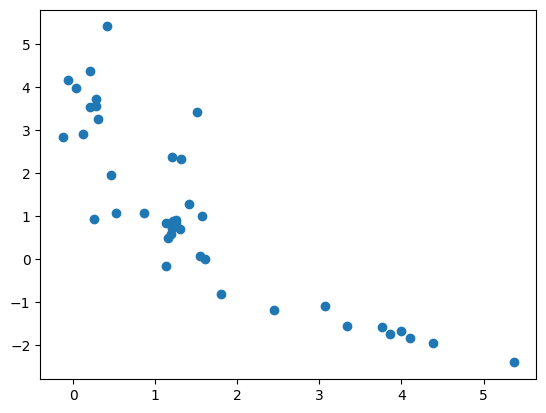

In [ ]:
plt.scatter(embedding[:,0], embedding[:,1])